In [80]:
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/")
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')

In [14]:
import casatools
tb = casatools.table()
ms = casatools.ms()
msmd = casatools.msmetadata()

In [173]:
ls -d *cal

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase1_int.cal/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase2_int.cal/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase3_int.cal/


In [12]:
ls -d *ms

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
G328.25_B3__continuum_merged.cal.ms/
W51-E_B3_uid___A001_X1296_X10b_continuum_merged_selfcal.ms/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_selfcal.ms/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_selfcal.ms/
W51-E_B6_uid___A001_X1296_X215_continuum_merged_selfcal.ms/


In [81]:
import selfcal_heuristics

In [83]:
#okfields,notokfields = selfcal_heuristics.goodenough_field_solutions('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_phase1_int.cal', minsnr=5)

In [84]:
okfields,notokfields = selfcal_heuristics.goodenough_field_solutions('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_phase1_int.cal', minsnr=5)
print(okfields, notokfields)

[] [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [15]:
msmd.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_selfcal.ms')

True

In [16]:
summary = msmd.summary()

In [77]:
#msmd.antennadiameter()

In [60]:
msmd.antennastations()

NameError: name 'UNKNOWN' is not defined

In [62]:
ants7m = [int(key) for key,val in antenna_diameters.items() if val['value'] == 7]
ants7m

[0, 1, 10, 2, 3, 4, 5, 55, 6, 7, 8, 9]

In [65]:
import numpy as np

In [74]:
exclude_7m=True
antenna_diameters = msmd.antennadiameter()
if exclude_7m:
    ants7m = np.array([int(key) for key,val in
                       antenna_diameters.items()
                       if val['value'] == 7])
    for scn in msmd.scannumbers():
        if np.any(np.isin(ants7m, msmd.antennasforscan(scn))):
            raise ValueError("7m antennae were excluded but still "
                              "appear in antenna table.  Antenna "
                              "string was {0}".format(antennae))


In [164]:
ms.close()
msmd.close()

True

In [177]:
print("TEST")

TEST


for scn in msmd.scannumbers():
    print(msmd.antennasforscan(scn))

In [174]:
ms.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_selfcal.ms')
msmd = ms.metadata()

antenna_diameters = msmd.antennadiameter()
antennae='test'
for ant in antenna_diameters.values():
    if ant['value'] < 12:
        raise ValueError("7m antennae were excluded but still "
                         "appear in antenna table.  Antenna "
                         "string was {0}".format(antennae))


In [175]:
phase = ms.getdata(items=['corrected_phase', 'phase', 'model_phase'])

In [176]:
phase.keys()

dict_keys(['corrected_phase', 'model_phase', 'phase'])

In [168]:
phase['corrected_phase'].shape

(2, 2, 8032122)

In [171]:
np.std(phase['corrected_phase'], axis=2)

array([[1.81313774, 1.81323604],
       [1.8132328 , 1.81316946]])

In [172]:
np.std(phase['phase'], axis=2)

array([[1.81313774, 1.81323604],
       [1.8132328 , 1.81316946]])

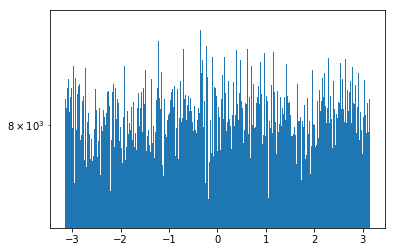

In [169]:
HLP = pl.hist(phase['corrected_phase'][0,0,:], bins=1000, log=True)

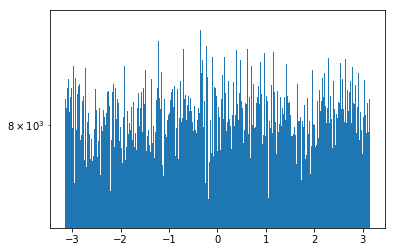

In [170]:
HLP = pl.hist(phase['phase'][0,0,:], bins=1000, log=True)

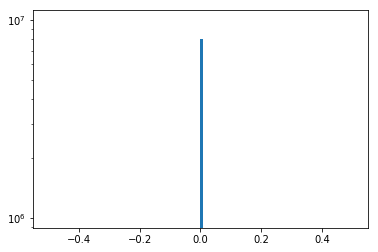

In [150]:
HLP = pl.hist(phase['model_phase'][0,0,:], bins=100, log=True)

In [27]:
%matplotlib inline
import pylab as pl

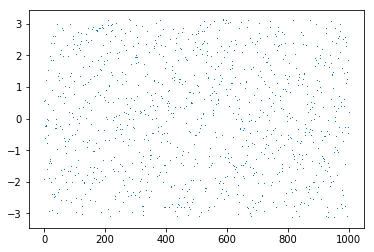

In [87]:
pl.plot(phase['corrected_phase'][0,0,:1000],',')

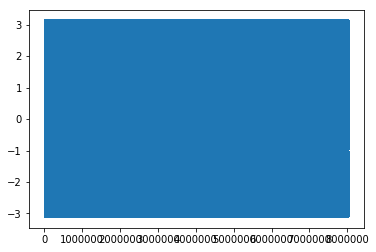

In [30]:
pl.plot(phase['phase'][0,1,:],',')

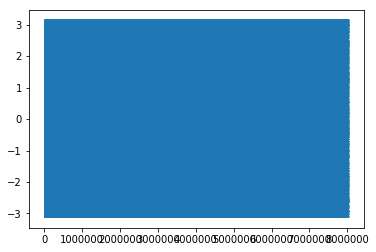

In [45]:
pl.plot(phase['phase'][1,0,:],',',alpha=0.25)

In [37]:
import casatasks

In [41]:
modelphase = ms.getdata(items=['modelphase'])

In [44]:
modelphase['modelphase'].shape

(0,)

In [42]:
pl.plot(modelphase['modelphase'][1,0,:],',', alpha=0.25)

IndexError: too many indices for array